In [1]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
%mat

In [2]:
path='C:\\Users\\dherschmann\\Documents\\GitHub\\Palmtree-Classifier'

In [83]:
try:
    os.mkdir(os.getcwd()+'/pics')
    os.mkdir(path+'/pics/training')
    os.mkdir(path+'/pics/testing')
    os.mkdir(path+'/pics/training/palm')
    os.mkdir(path+'/pics/training/snow')
    os.mkdir(path+'/pics/training/rest')
    os.mkdir(path+'/pics/testing/palm')
    os.mkdir(path+'/pics/testing/snow')
    os.mkdir(path+'/pics/testing/rest')
except:
    pass

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

    files = []
    for file in os.listdir(SOURCE):
        files.append(file)

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    #shuffled_set = random.sample(files, len(files))
    random.shuffle(files)
    shuffled_set = files
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

In [6]:
os.getcwd()

'C:\\Users\\dherschmann\\Documents\\GitHub\\Palmtree-Classifier'

In [84]:
PALM_SOURCE_DIR = path+"/allpalms/"
TRAINING_PALM_DIR = path+"/pics/training/palm/"
TESTING_PALM_DIR = path+"/pics/testing/palm/"
SNOW_SOURCE_DIR = path+"/allnieve/"
TRAINING_SNOW_DIR = path+"/pics/training/snow/"
TESTING_SNOW_DIR = path+"/pics/testing/snow/"
REST_SOURCE_DIR = path+"/allnone/"
TRAINING_REST_DIR =path+"/pics/training/rest/"
TESTING_REST_DIR =path+"/pics/testing/rest/"

split_size = .8
split_data(PALM_SOURCE_DIR, TRAINING_PALM_DIR, TESTING_PALM_DIR, split_size)
split_data(SNOW_SOURCE_DIR, TRAINING_SNOW_DIR, TESTING_SNOW_DIR, split_size)
split_data(REST_SOURCE_DIR, TRAINING_REST_DIR, TESTING_REST_DIR, split_size)

print(len(os.listdir(path+'/pics/training/palm/')))
print(len(os.listdir(path+"/pics/testing/palm/")))
print(len(os.listdir(path+"/pics/training/snow/")))
print(len(os.listdir(path+"/pics/testing/snow/")))
print(len(os.listdir(path+"/pics/training/rest/")))
print(len(os.listdir(path+"/pics/testing/rest/")))

364
91
392
98
753
189


In [85]:
total=len(os.listdir(path+'/allpalms/'))+len(os.listdir(path+'/allnieve/'))+len(os.listdir(path+'/allnone/'))
print('Anteil Palmen in Prozent: ',round(100*len(os.listdir(path+'/allpalms/'))/total,1))
print('Anteil Schnee in Prozent: ',round(100*len(os.listdir(path+'/allnieve/'))/total,1))
print('Anteil Rest in Prozent: ',round(100*len(os.listdir(path+'/allnone/'))/total,1))

Anteil Palmen in Prozent:  24.1
Anteil Schnee in Prozent:  26.0
Anteil Rest in Prozent:  49.9


In [86]:
TRAINING_DIR =path+"/pics/training/"
train_datagen =ImageDataGenerator(rescale=1/255.0) 
train_generator =train_datagen.flow_from_directory(TRAINING_DIR, batch_size=25,
                                                  class_mode='categorical',target_size=(224,224))

VALIDATION_DIR =path+"/pics/testing/" 
validation_datagen = ImageDataGenerator(rescale=1/255.0)
validation_generator =validation_datagen.flow_from_directory(VALIDATION_DIR, batch_size=25,
                                                            class_mode='categorical', target_size=(224,224))

Found 1509 images belonging to 3 classes.
Found 378 images belonging to 3 classes.


In [87]:
%matplotlib inline
def plot_acc_and_loss(hist):
    acc = hist.history['acc']
    val_acc = hist.history['val_acc']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs = range(len(acc))
    f, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

    ax1.plot(epochs, acc, 'r', label='Training accuracy')
    ax1.plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax1.legend()
    ax2.plot(epochs, loss, 'r', label='Training Loss')
    ax2.plot(epochs, val_loss, 'b', label='Validation Loss')
    ax2.legend()
    f.show()

In [117]:
import cv2
import numpy as np
img = cv2.imread(path+'/pics/testing/palm/250721690_4655418801188549_5741293844478096147_n.jpg')
img = np.expand_dims(img, axis=0)
model1.predict(img)

array([[0., 1., 0.]], dtype=float32)

In [123]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (100, 100, 3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load(path+'/pics/testing/palm/250721690_4655418801188549_5741293844478096147_n.jpg')
model1.predict(image)

array([[7.320504e-02, 9.267086e-01, 8.638466e-05]], dtype=float32)

In [124]:
np.argmax(model1.predict(image))

1

---
## Models
---


In [45]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(50, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(50, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3,activation='softmax')])

 
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['acc'])
#model1.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [31]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 50)      1400      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 50)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 50)      22550     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 50)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 54, 54, 50)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 145800)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)               

In [46]:
history1 = model1.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)

#model1.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/10
76/76 [==============================] - 216s 3s/step - loss: 1.1679 - acc: 0.5103 - val_loss: 0.9281 - val_acc: 0.5756
Epoch 2/10
76/76 [==============================] - 208s 3s/step - loss: 0.8700 - acc: 0.6574 - val_loss: 0.8072 - val_acc: 0.6499
Epoch 3/10
76/76 [==============================] - 210s 3s/step - loss: 0.7327 - acc: 0.6687 - val_loss: 0.8653 - val_acc: 0.6472
Epoch 4/10
76/76 [==============================] - 216s 3s/step - loss: 0.6318 - acc: 0.7325 - val_loss: 0.7135 - val_acc: 0.6923
Epoch 5/10
76/76 [==============================] - 233s 3s/step - loss: 0.5940 - acc: 0.7538 - val_loss: 0.6902 - val_acc: 0.7162
Epoch 6/10
76/76 [==============================] - 212s 3s/step - loss: 0.5157 - acc: 0.7784 - val_loss: 0.8144 - val_acc: 0.7162
Epoch 7/10
76/76 [==============================] - 208s 3s/step - loss: 0.4380 - acc: 0.8217 - val_loss: 0.7782 - val_acc: 0.7003
Epoch 8/10
76/76 [==============================] - 210s 3s/step - loss: 0.3807 - a

<ipython-input-53-e945e4138ec4>:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


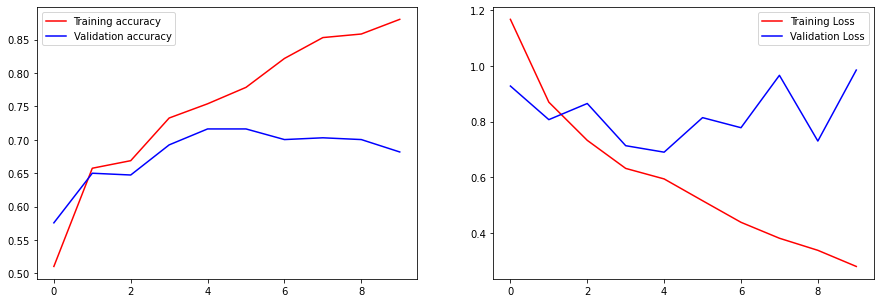

In [54]:
plot_acc_and_loss(history1)

---
## Besseres Model
---

In [55]:
model1b = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')

])

model1b.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])


In [57]:
model1b.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 52, 52, 64)       

In [56]:
historyb = model1b.fit_generator(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/15
76/76 [==============================] - 176s 2s/step - loss: 3.2127 - acc: 0.4884 - val_loss: 0.9472 - val_acc: 0.5093
Epoch 2/15
76/76 [==============================] - 185s 2s/step - loss: 0.8830 - acc: 0.6094 - val_loss: 0.8999 - val_acc: 0.4934
Epoch 3/15
76/76 [==============================] - 183s 2s/step - loss: 0.8031 - acc: 0.6707 - val_loss: 0.9099 - val_acc: 0.5093
Epoch 4/15
76/76 [==============================] - 192s 3s/step - loss: 0.6847 - acc: 0.7112 - val_loss: 0.8488 - val_acc: 0.5597
Epoch 5/15
76/76 [==============================] - 223s 3s/step - loss: 0.6521 - acc: 0.7265 - val_loss: 0.8084 - val_acc: 0.6021
Epoch 6/15
76/76 [==============================] - 177s 2s/step - loss: 0.5746 - acc: 0.7611 - val_loss: 0.7787 - val_acc: 0.6605
Epoch 7/15
76/76 [==============================] - 216s 3s/step - loss: 0.5315 - acc: 0.7844 - val_loss: 0.8216 - val_acc: 0.6366
Epoch 8/15
76/76 [==============================] - 183s 2s/step - loss: 0.5055 - a

<ipython-input-87-e945e4138ec4>:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


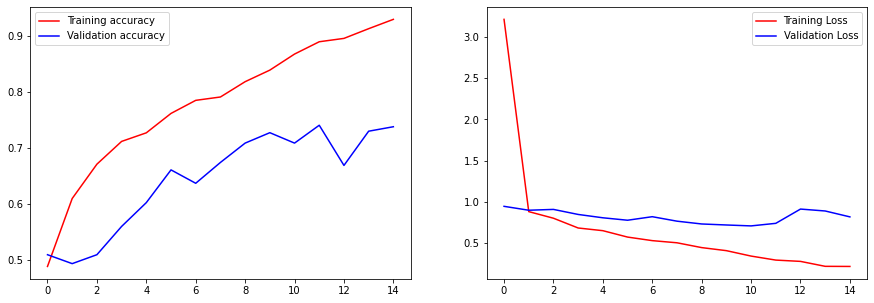

In [90]:
plot_acc_and_loss(historyb)

---
# Pre-trained
---

In [88]:
base_model=tf.keras.applications.MobileNetV2(input_shape=(224,224,3),weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
x=base_model.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dropout(0.4)(x)
x=tf.keras.layers.Dense(600,activation='relu')(x)
#x=tf.keras.layers.LeakyReLU(alpha=0.3)(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(400,activation='relu')(x)
preds=tf.keras.layers.Dense(3,activation='softmax')(x)

modelMNV2=tf.keras.models.Model(inputs=base_model.input,outputs=preds)

for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in modelMNV2.layers[:156]:
    layer.trainable=False
for layer in modelMNV2.layers[156:]:
    layer.trainable=True
    
modelMNV2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

step_size_train=train_generator.n//train_generator.batch_size

modelMNV2.summary()

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________

In [89]:
historyMNV2 = modelMNV2.fit_generator(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/15
61/61 [==============================] - 173s 3s/step - loss: 0.6531 - acc: 0.7409 - val_loss: 0.3307 - val_acc: 0.8757
Epoch 2/15
61/61 [==============================] - 170s 3s/step - loss: 0.3668 - acc: 0.8555 - val_loss: 0.3193 - val_acc: 0.8651
Epoch 3/15
61/61 [==============================] - 182s 3s/step - loss: 0.3165 - acc: 0.8728 - val_loss: 0.2861 - val_acc: 0.8836
Epoch 4/15
61/61 [==============================] - 190s 3s/step - loss: 0.2912 - acc: 0.8827 - val_loss: 0.3180 - val_acc: 0.8677
Epoch 5/15
61/61 [==============================] - 244s 4s/step - loss: 0.2494 - acc: 0.9066 - val_loss: 0.2904 - val_acc: 0.8783
Epoch 6/15
61/61 [==============================] - 241s 4s/step - loss: 0.2025 - acc: 0.9218 - val_loss: 0.2809 - val_acc: 0.8942
Epoch 7/15
61/61 [==============================] - 232s 4s/step - loss: 0.1791 - acc: 0.9317 - val_loss: 0.2859 - val_acc: 0.9021
Epoch 8/15
61/61 [==============================] - 234s 4s/step - loss: 0.2119 - a

<ipython-input-87-e945e4138ec4>:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


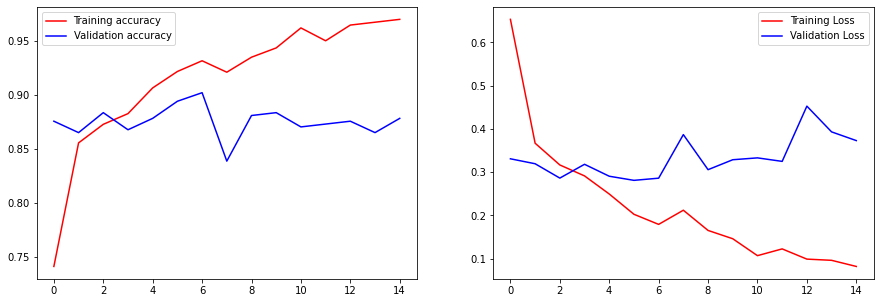

In [91]:
plot_acc_and_loss(historyMNV2)

In [93]:
modelMNV2.compile(optimizer=RMSprop(lr=0.001),loss='categorical_crossentropy',metrics=['acc'])

In [94]:
historyMNV2version2 = modelMNV2.fit_generator(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/15
61/61 [==============================] - 184s 3s/step - loss: 0.1578 - acc: 0.9523 - val_loss: 0.5126 - val_acc: 0.8598
Epoch 2/15
61/61 [==============================] - 179s 3s/step - loss: 0.0844 - acc: 0.9662 - val_loss: 0.4419 - val_acc: 0.8915
Epoch 3/15
61/61 [==============================] - 174s 3s/step - loss: 0.0848 - acc: 0.9742 - val_loss: 0.6408 - val_acc: 0.8810
Epoch 4/15
 7/61 [==>...........................] - ETA: 1:56 - loss: 0.0935 - acc: 0.9686

KeyboardInterrupt: 

---
# VGG
---

In [106]:
new_input = tf.keras.Input(shape=(224, 224, 3))
#model = VGG16(include_top=False, input_tensor=new_input)
base_modelvgg=tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
x=base_modelvgg.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dropout(0.4)(x)
x=tf.keras.layers.Dense(200,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(200,activation='relu')(x)
preds=tf.keras.layers.Dense(3,activation='softmax')(x)

modelVGG=tf.keras.models.Model(inputs=base_modelvgg.input,outputs=preds)

for layer in modelVGG.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in modelVGG.layers[:16]:
    layer.trainable=False
for layer in modelVGG.layers[16:]:
    layer.trainable=True
    
modelVGG.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

step_size_train=train_generator.n//train_generator.batch_size

modelVGG.summary()

Model: "functional_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [104]:
len(modelVGG.layers)

26

In [107]:
historyVGG = modelVGG.fit_generator(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/15
61/61 [==============================] - 629s 10s/step - loss: 1.0640 - acc: 0.4725 - val_loss: 0.9791 - val_acc: 0.5000
Epoch 2/15
61/61 [==============================] - 593s 10s/step - loss: 0.9813 - acc: 0.4990 - val_loss: 0.8666 - val_acc: 0.5000
Epoch 3/15
61/61 [==============================] - 566s 9s/step - loss: 0.9315 - acc: 0.5103 - val_loss: 0.8685 - val_acc: 0.5000
Epoch 4/15
46/61 [=====================>........] - ETA: 1:59 - loss: 0.8632 - acc: 0.6130

KeyboardInterrupt: 

In [ ]:
predictions = model.predict(samples_to_predict)

In [ ]:
os.listdir(path+'/pics/testing/palm')